Importing the libraries below, which we will be using throughout the notebook

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
#load the data in a data frame 
loan_df = pd.read_csv("loan.csv")

In [137]:
# checking the shape of the dataframe
print('Shape -> ', loan_df.shape)

Shape ->  (39717, 111)


In [138]:

print(loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [139]:
#check null counts in various columns. Columns in which all values are null are not required for analysis. Hence we need to remove them!
print(loan_df.isnull().all().to_string())

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                         False
emp_length                        False
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                              False
purpose                           False
title                             False
zip_code                          False
addr_state                        False
dti                               False


In [140]:
loan_df.shape

(39717, 111)

In [141]:
#dropping the columns which have all null values
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [142]:
loan_df.shape

(39717, 57)

Out of 110 columns 57 are left. We need to further identify and explore which columns would be really required for our analysis.

In [143]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### We need to identify which columns have only one or two values and eliminate them

In [144]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### Removing the columns which are useful in EDA such as - 
-  "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".

#### We can also ignore below columns which are not used for predicting if the applicant to default the loan or not!
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record
- delinq_2yrs
- revol_bal
- total_rec_late_fee

In [145]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [146]:
loan_df.shape

(39717, 21)

In [147]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

We cannot make anything up for the current loans. To exclude that data , removing the records with current loan status

In [148]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Check for mising values

In [149]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

### **Handling Missing values**
 - columns with missing values are "emp_length", "revol_util". 
 - So before doing that, lets see what kind of data each column has. 

In [150]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [151]:
print("Mode : " + loan_df.emp_length.mode()[0])
loan_df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [152]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

In [153]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

## Standardizing the data 
- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [154]:
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [ ]:
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))

In [ ]:
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [159]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Remove Outliers from the dataset

<Axes: ylabel='annual_inc'>

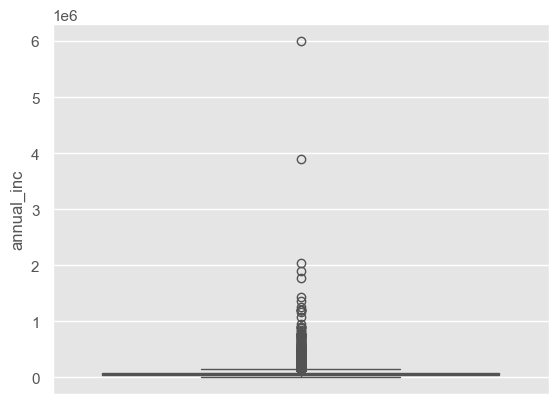

In [160]:
sns.boxplot(loan_df['annual_inc'])

Above graph is indicating the presence of outliers

In [161]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [162]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

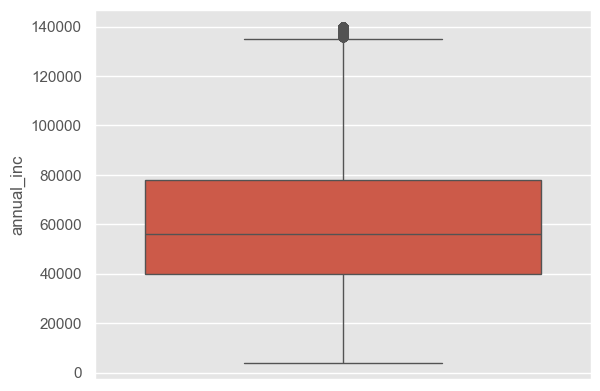

In [163]:
sns.boxplot(loan_df.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: ylabel='dti'>

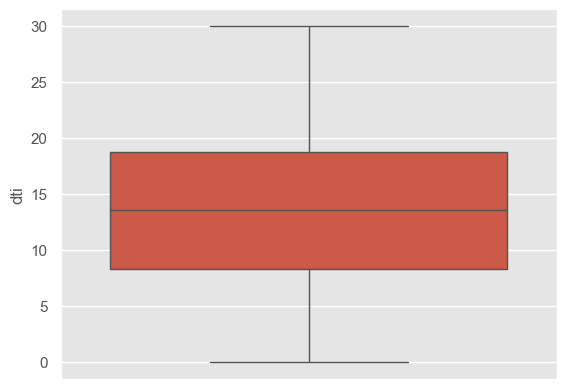

In [164]:
sns.boxplot(loan_df.dti)

<Axes: ylabel='loan_amnt'>

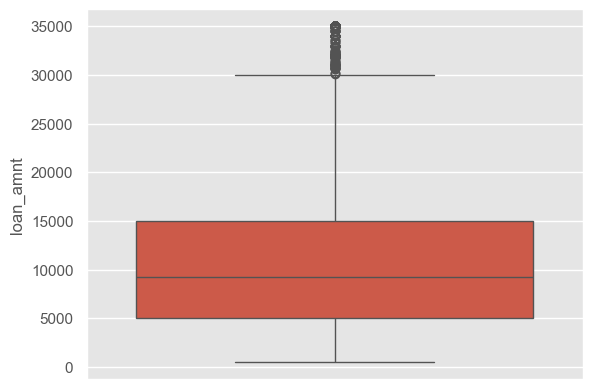

In [165]:
sns.boxplot(loan_df.loan_amnt)

In [166]:
quantile_info = loan_df.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

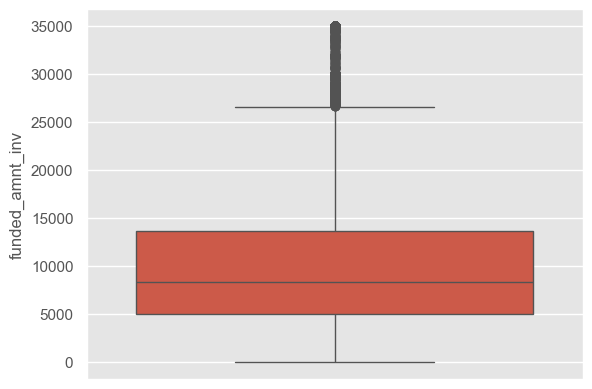

In [167]:
sns.boxplot(loan_df.funded_amnt_inv)

In [168]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

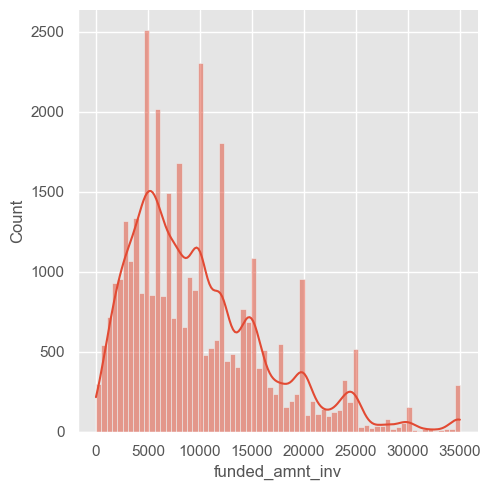

In [169]:
sns.displot(loan_df.funded_amnt_inv, kde = True)
plt.show()

Values are contineous hence we can say that there are no significant outliers.

In [170]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

## Visualizing Categorical Data 
### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

### **Univariate Analysis**

<Axes: xlabel='loan_status', ylabel='count'>

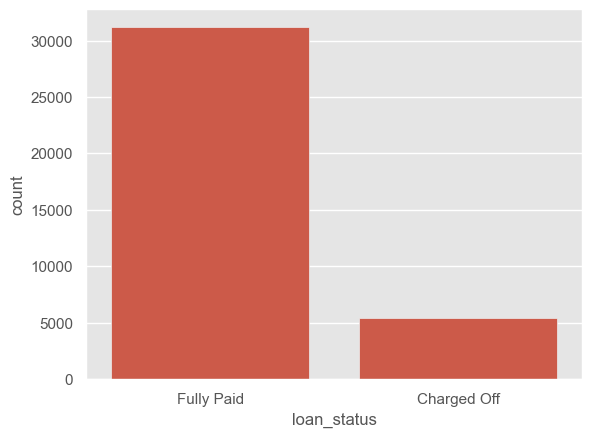

In [171]:
sns.countplot(x = 'loan_status', data = loan_df)

In [172]:
loan_df[['funded_amnt_inv','loan_amnt']]

,funded_amnt_inv,loan_amnt
0,4975.0,5000
1,2500.0,2500
2,2400.0,2400
3,10000.0,10000
5,5000.0,5000
...,...,...
39711,700.0,5000
39712,1075.0,2500
39713,875.0,8500
39714,1325.0,5000


In [173]:
loan_df[['grade', 'sub_grade']]

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
5,A,A4
...,...,...
39711,B,B1
39712,A,A4
39713,C,C1
39714,A,A4


In [174]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

### Let us create a countplot for visualizing which grades and sub-grades have the most defaulters!

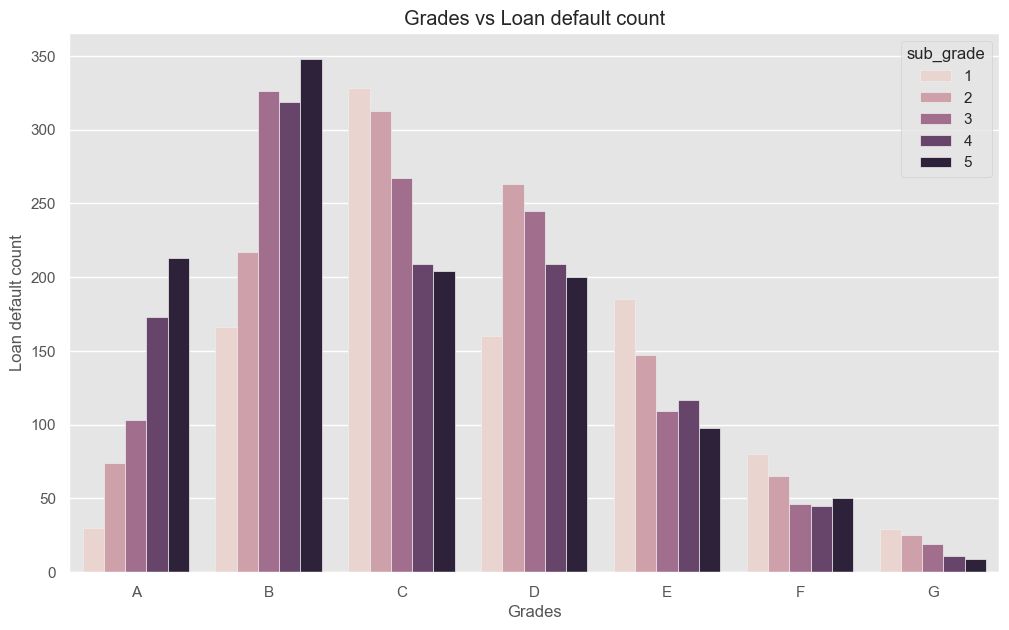

In [175]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.title('Grades vs Loan default count')
plt.xlabel('Grades')
plt.ylabel('Loan default count')
plt.show()

### From above graph it looks like that many defaulters are from B and C grades and specifically, people from 5th subgrade of B are higher in %.

<Axes: xlabel='grade', ylabel='count'>

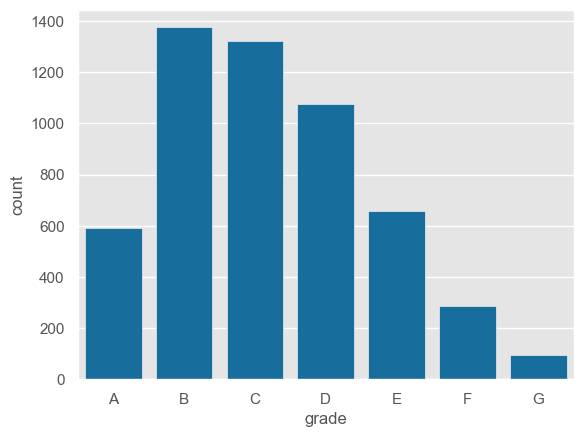

In [176]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [177]:
#checking unique values for home_ownership
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [178]:
loan_df[loan_df['home_ownership'] == 'NONE'][['loan_amnt', 'loan_status','home_ownership']]

,loan_amnt,loan_status,home_ownership
39318,10000,Fully Paid,NONE
39659,4000,Fully Paid,NONE
39660,2800,Fully Paid,NONE


Hence deleting these rows!

In [179]:
loan_df = loan_df[~(loan_df['home_ownership'] == 'NONE')]

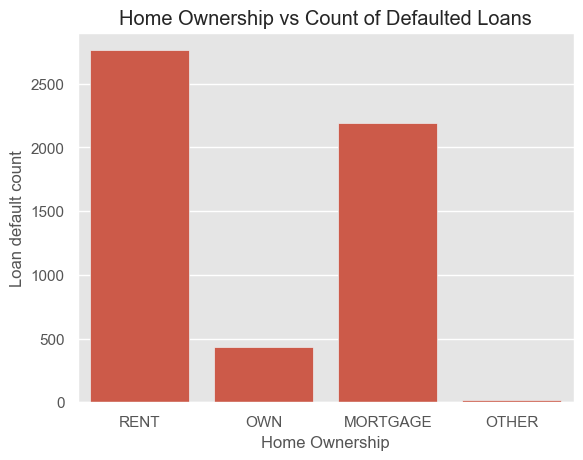

In [182]:
plt.style.use('ggplot')
#ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Home Ownership vs Count of Defaulted Loans')
plt.xlabel('Home Ownership')
plt.ylabel('Loan default count')
plt.show()

*Gives us some idea that people with 'Rent' and 'Mortgage' type of homes default the loan often!*

In [183]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


<Axes: xlabel='count', ylabel='purpose'>

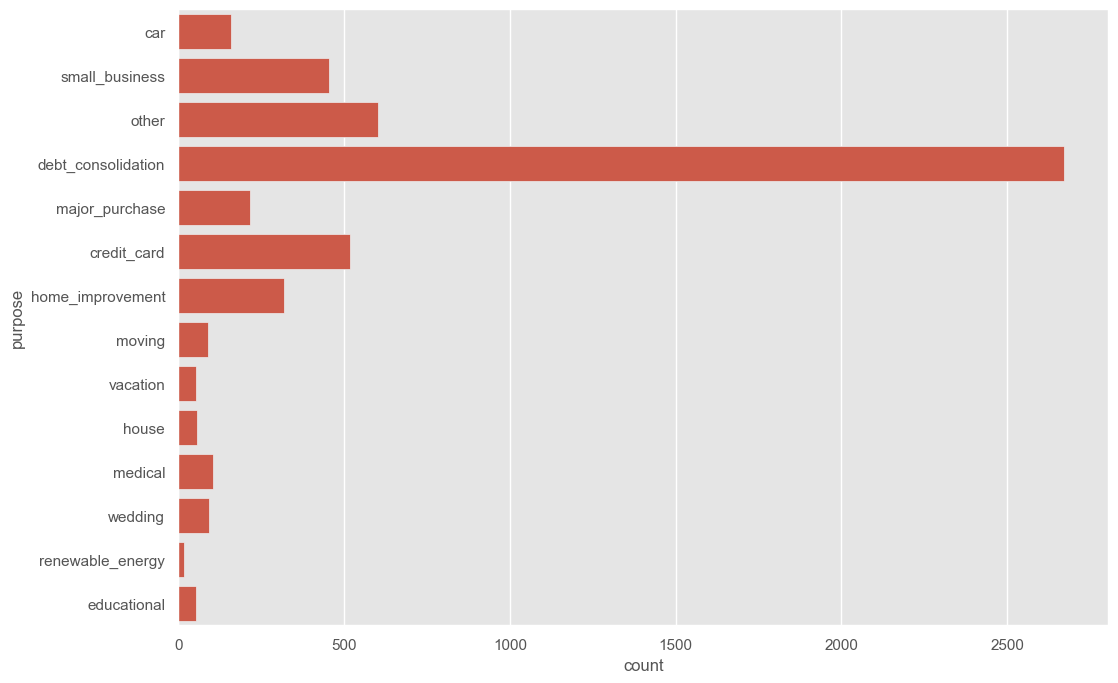

In [184]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

### Let us now create bins for int_rate to identify which interest rate groups cause loans to default

In [185]:
loan_df['int_rate'].value_counts()

int_rate
10.99    863
7.51     768
11.49    756
13.49    722
7.88     702
        ... 
10.64      1
18.36      1
22.94      1
22.64      1
15.01      1
Name: count, Length: 370, dtype: int64

In [186]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

Text(0, 0.5, 'Charged Off loan count')

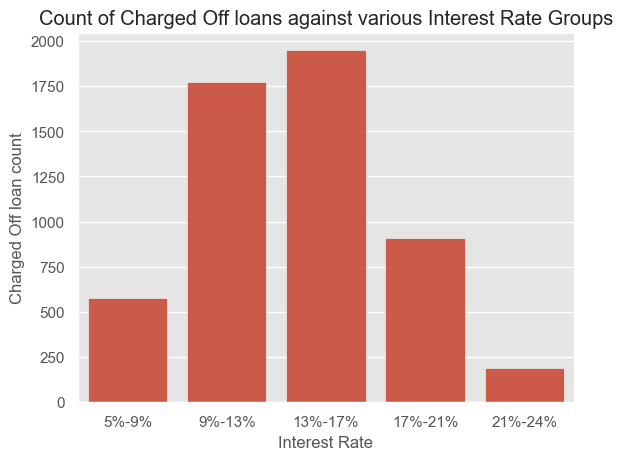

In [187]:
plt.style.use('ggplot')
sns.countplot(data=loan_df[loan_df['loan_status'] == 'Charged Off'], x='int_rate_groups')
plt.title("Count of Charged Off loans against various Interest Rate Groups")
plt.xlabel('Interest Rate')
plt.ylabel('Charged Off loan count')

Text(0.5, 0, 'Employment Duration')

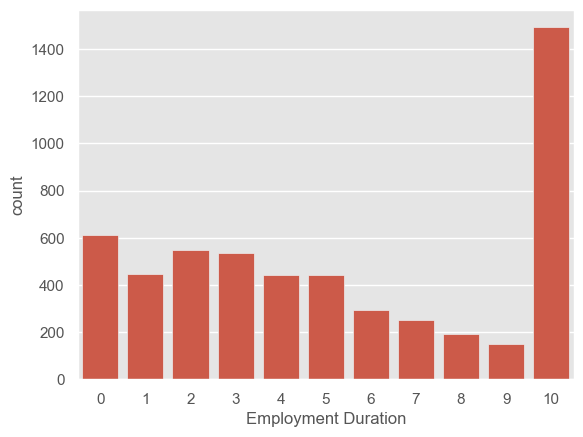

In [188]:
sns.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Employment Duration')

In [189]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36603 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36603 non-null  int64   
 1   funded_amnt_inv      36603 non-null  float64 
 2   term                 36603 non-null  object  
 3   int_rate             36603 non-null  float64 
 4   installment          36603 non-null  float64 
 5   grade                36603 non-null  object  
 6   sub_grade            36603 non-null  int64   
 7   emp_length           36603 non-null  int64   
 8   home_ownership       36603 non-null  object  
 9   annual_inc           36603 non-null  float64 
 10  verification_status  36603 non-null  object  
 11  issue_d              36603 non-null  object  
 12  loan_status          36603 non-null  object  
 13  purpose              36603 non-null  object  
 14  dti                  36603 non-null  float64 
 15  earliest_cr_line     366

In [190]:
pd.cut(loan_df['annual_inc'], bins=5,precision =0)

0          (3864.0, 31201.0]
1          (3864.0, 31201.0]
2          (3864.0, 31201.0]
3         (31201.0, 58402.0]
5         (31201.0, 58402.0]
                ...         
39711     (58402.0, 85602.0]
39712    (85602.0, 112803.0]
39713      (3864.0, 31201.0]
39714    (85602.0, 112803.0]
39716      (3864.0, 31201.0]
Name: annual_inc, Length: 36603, dtype: category
Categories (5, interval[float64, right]): [(3864.0, 31201.0] < (31201.0, 58402.0] < (58402.0, 85602.0] < (85602.0, 112803.0] < (112803.0, 140004.0]]

In [191]:
loan_df['annual_inc_grp'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

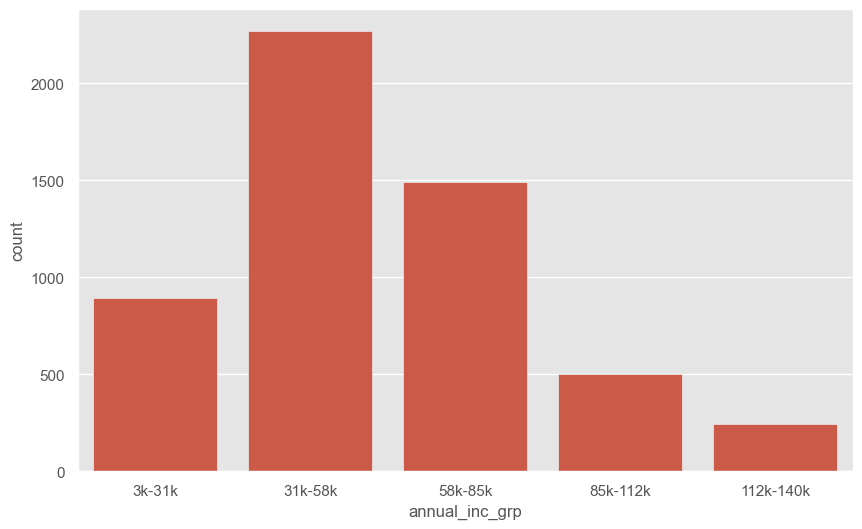

In [192]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_grp', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

In [193]:
pivtab1 = loan_df.pivot_table(loan_df, columns='loan_status', index='annual_inc_grp', aggfunc='size')

In [194]:
# Adding a new column for percentage difference
#pivtab['CO_Percentage*10'] = ((pivtab['Charged Off']) * 100) / (pivtab['Fully Paid'] + pivtab['Charged Off']) * 10
#pivtab.head()

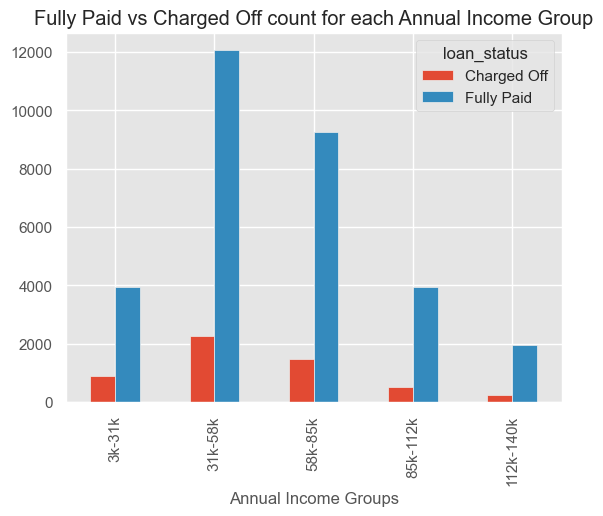

In [195]:
pivtab1.plot.bar()
plt.title("Fully Paid vs Charged Off count for each Annual Income Group")
plt.xlabel("Annual Income Groups")
plt.show()

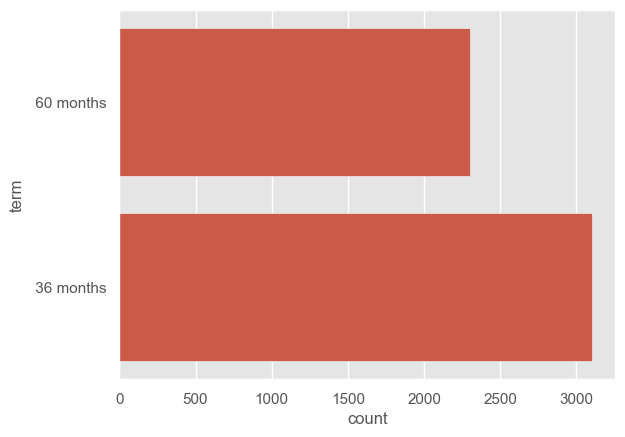

In [196]:
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [197]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

In [198]:
loan_df.shape

(36603, 25)

<Axes: xlabel='issue_year', ylabel='count'>

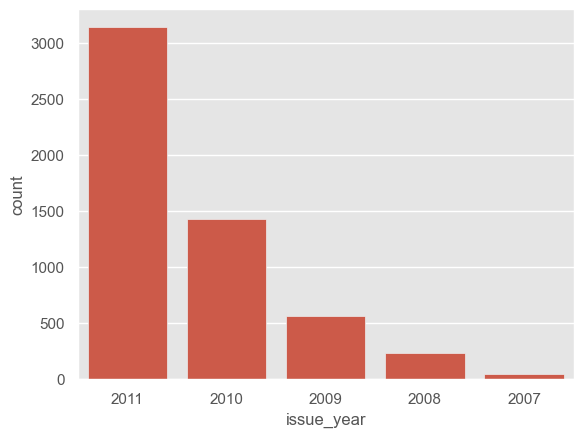

In [199]:
sns.countplot(loan_df[loan_df['loan_status'] == 'Charged Off'], x='issue_year')

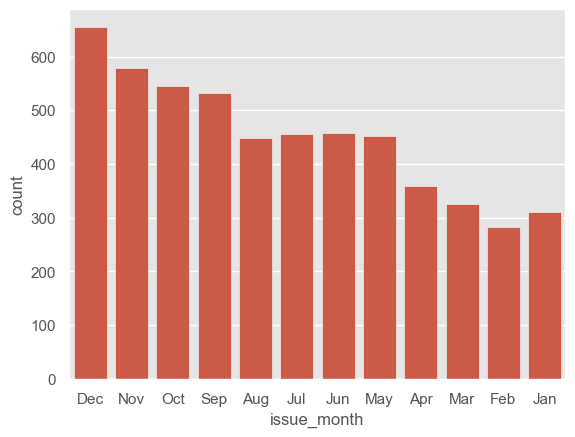

In [200]:
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

### **Bivariate Analysis**

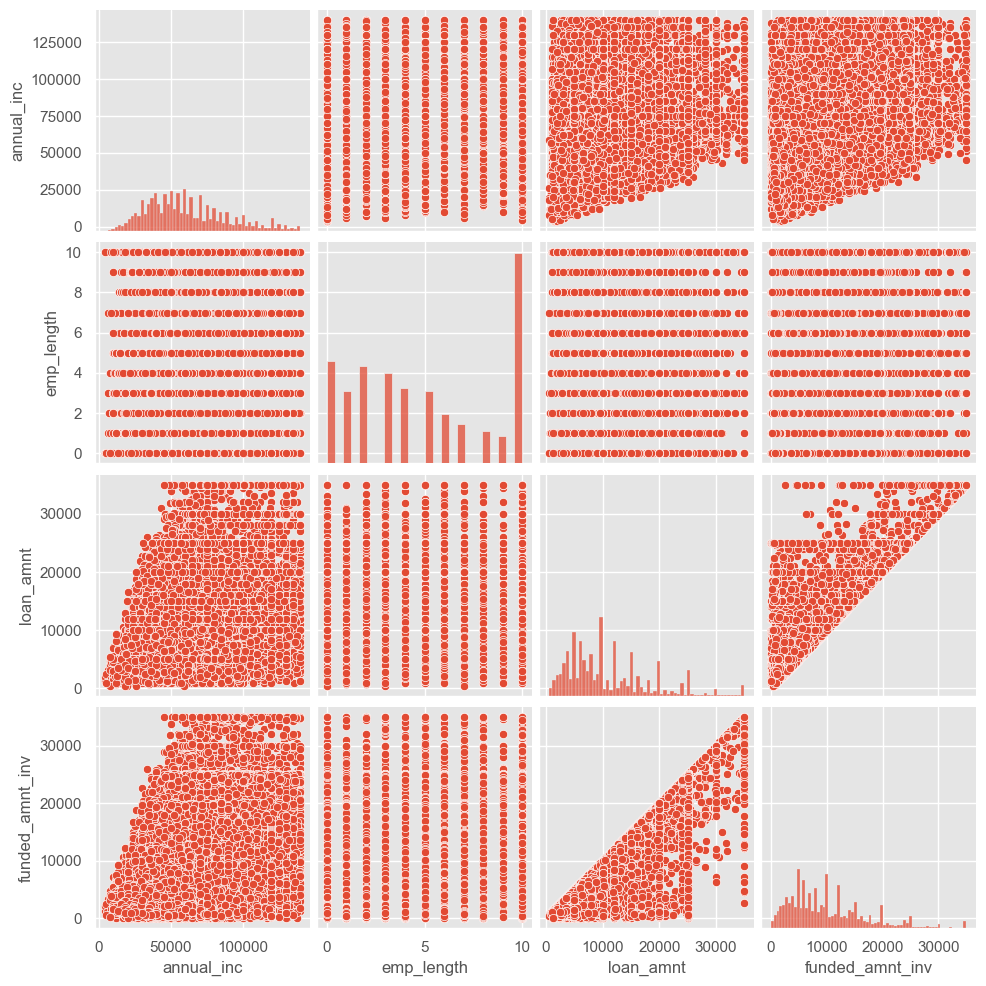

In [201]:
sns.pairplot(data = loan_df[['annual_inc', 'emp_length','loan_amnt', 'funded_amnt_inv']])
#plt.title('Paiplot showing relationship of multiple fields with each other')
plt.show()

Interestingly there is no relationship between emp_length and loan_amnt! 

In [202]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'int_rate_groups', 'annual_inc_grp',
       'issue_month', 'issue_year'],
      dtype='object')

In [203]:
loan_df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36603, dtype: object

In [204]:
sns.set(style="whitegrid")

In [205]:
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<Figure size 1000x1000 with 0 Axes>

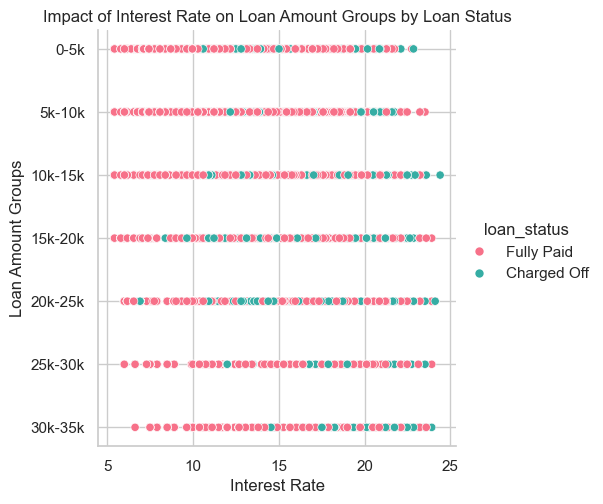

In [206]:
plt.figure(figsize=(10,10))
sns.relplot(x="int_rate", y="loan_amnt_groups", hue="loan_status", data=loan_df, kind="scatter", palette="husl")
# Displaying the plot
plt.title("Impact of Interest Rate on Loan Amount Groups by Loan Status")
plt.xlabel("Interest Rate")
plt.ylabel("Loan Amount Groups")
plt.show()

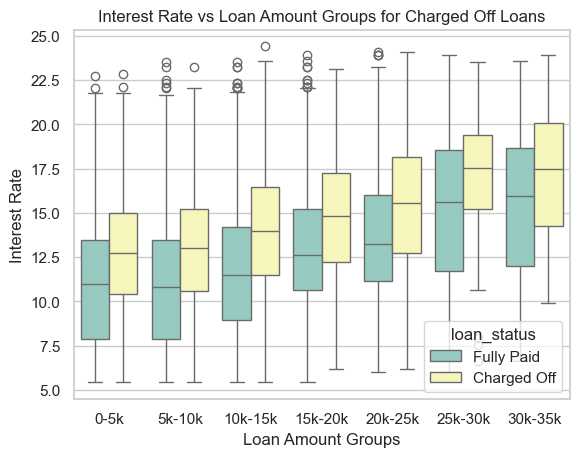

In [207]:
sns.boxplot(x="loan_amnt_groups", y="int_rate", hue="loan_status", data=loan_df, palette="Set3")
plt.title("Interest Rate vs Loan Amount Groups for Charged Off Loans")
plt.ylabel("Interest Rate")
plt.xlabel("Loan Amount Groups")
plt.show()

### Annual Income vs Loan Amount

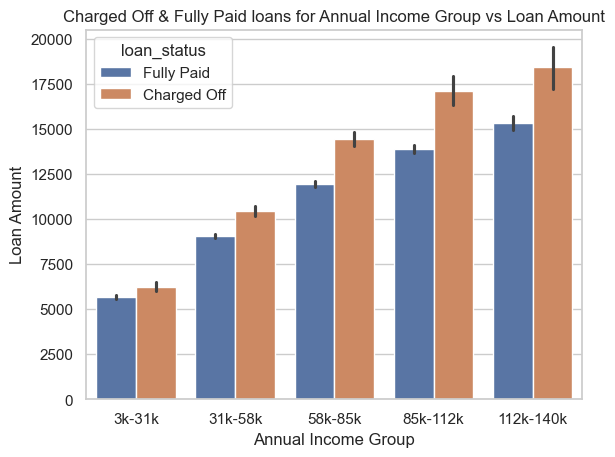

In [208]:
sns.barplot(x = "annual_inc_grp", y = "loan_amnt", hue = 'loan_status', data = loan_df)
plt.xlabel('Annual Income Group')
plt.ylabel('Loan Amount')
plt.title('Charged Off & Fully Paid loans for Annual Income Group vs Loan Amount')
plt.show()

### Loan Amount vs Interest Rate

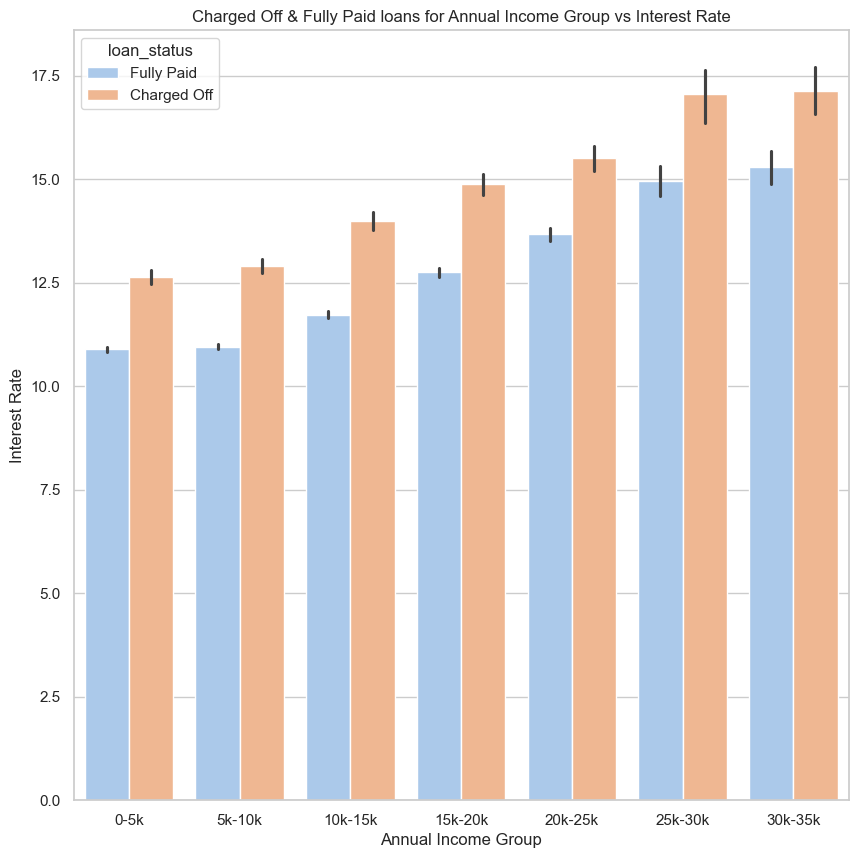

In [209]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.xlabel('Annual Income Group')
plt.ylabel('Interest Rate')
plt.title('Charged Off & Fully Paid loans for Annual Income Group vs Interest Rate')
plt.show()

In [210]:
import calendar
month_dict = dict((v, k) for k, v in enumerate(calendar.month_abbr))
loan_df['month_num'] = loan_df['issue_month'].map(month_dict)

In [211]:
loan_status_dict = {'Fully Paid':0, 'Charged Off':1}
loan_df['loan_status_num'] = loan_df['loan_status'].map(loan_status_dict)

### Let us build a Heatmap for various attributes to understand the correlation

In [212]:
heatmap_df = loan_df[['loan_amnt', 'int_rate', 'funded_amnt_inv', 'emp_length', 'annual_inc', 'open_acc', 'installment', 'month_num', 'loan_status_num']]

<Axes: >

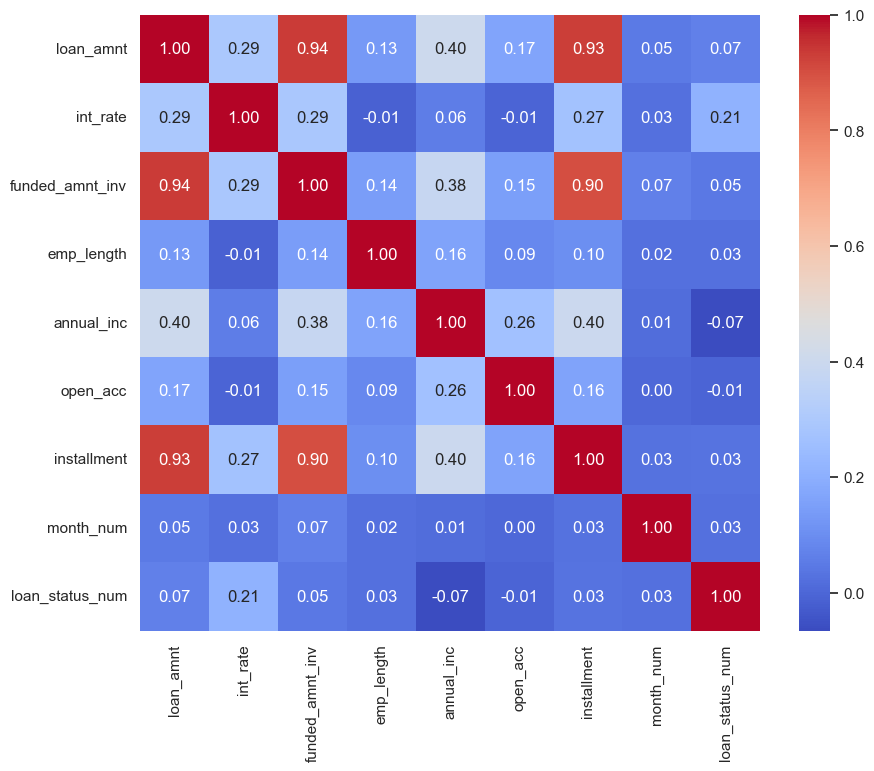

In [213]:
plt.figure(figsize=(10, 8))  # Adjust size if necessary
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")